# Least Squares Method & Error Estimations
**FIZ353 - Numerical Analysis | 23/10/2020**

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

# Data & Import
The free-fall data we will be using is taken from: D. Horvat & R. Jecmenica, "The Free Fall Experiment" _Resonance_ **21** 259-275 (2016) [\[https://doi.org/10.1007/s12045-016-0321-9\]](https://doi.org/10.1007/s12045-016-0321-9).

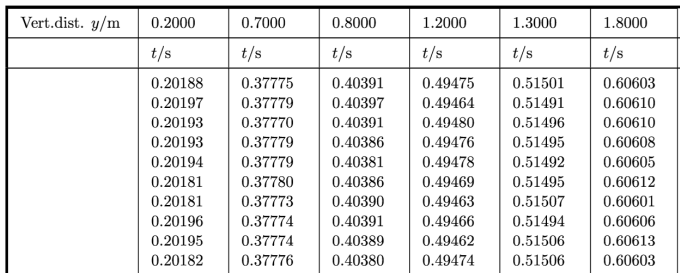

Here's the contents of our data file:

In [1]:
import pandas as pd
data1 = pd.read_csv("data/03_FreeFallData.csv")
data1.columns
data1

,Vert.dist. y/m,0.2,0.7,0.8,1.2,1.3,1.8
0,NaN,t/s,t/s,t/s,t/s,t/s,t/s
1,1,0.20188,0.37775,0.40391,0.49475,0.51501,0.60603
2,2,0.20197,0.37779,0.40397,0.49464,0.51491,0.60610
3,3,0.20193,0.37770,0.40391,0.49480,0.51496,0.60610
4,4,0.20193,0.37779,0.40386,0.49476,0.51495,0.60608
5,5,0.20194,0.37779,0.40381,0.49478,0.51492,0.60605
6,6,0.20181,0.37780,0.40386,0.49469,0.51495,0.60612
7,7,0.20181,0.37773,0.40390,0.49463,0.51507,0.60601
8,8,0.20196,0.37774,0.40391,0.49466,0.51494,0.60606
9,9,0.20195,0.37774,0.40389,0.49462,0.51506,0.60613


We don't need the first row and first column, so let's remove them:

[pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [2]:
data1.drop(0, inplace=True)
data1.drop(11, inplace=True)
data1.drop(['Vert.dist. y/m'],axis=1, inplace=True)
data1

,0.2,0.7,0.8,1.2,1.3,1.8
1,0.20188,0.37775,0.40391,0.49475,0.51501,0.60603
2,0.20197,0.37779,0.40397,0.49464,0.51491,0.60610
3,0.20193,0.37770,0.40391,0.49480,0.51496,0.60610
4,0.20193,0.37779,0.40386,0.49476,0.51495,0.60608
5,0.20194,0.37779,0.40381,0.49478,0.51492,0.60605
6,0.20181,0.37780,0.40386,0.49469,0.51495,0.60612
7,0.20181,0.37773,0.40390,0.49463,0.51507,0.60601
8,0.20196,0.37774,0.40391,0.49466,0.51494,0.60606
9,0.20195,0.37774,0.40389,0.49462,0.51506,0.60613
10,0.20182,0.37776,0.40380,0.49474,0.51506,0.60603


In [3]:
data1.loc[2,"0.7"]

'0.37779'

In [4]:
type(data1.loc[2,"0.7"])

str

In [5]:
data1.dtypes

0.2    object
0.7    object
0.8    object
1.2    object
1.3    object
1.8    object
dtype: object

In [6]:
data1 = data1.astype('float')
data1.dtypes

0.2    float64
0.7    float64
0.8    float64
1.2    float64
1.3    float64
1.8    float64
dtype: object

[pandas.DataFrame.reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

In [7]:
data1.reset_index(inplace=True)
data1

,index,0.2,0.7,0.8,1.2,1.3,1.8
0,1,0.20188,0.37775,0.40391,0.49475,0.51501,0.60603
1,2,0.20197,0.37779,0.40397,0.49464,0.51491,0.60610
2,3,0.20193,0.37770,0.40391,0.49480,0.51496,0.60610
3,4,0.20193,0.37779,0.40386,0.49476,0.51495,0.60608
4,5,0.20194,0.37779,0.40381,0.49478,0.51492,0.60605
5,6,0.20181,0.37780,0.40386,0.49469,0.51495,0.60612
6,7,0.20181,0.37773,0.40390,0.49463,0.51507,0.60601
7,8,0.20196,0.37774,0.40391,0.49466,0.51494,0.60606
8,9,0.20195,0.37774,0.40389,0.49462,0.51506,0.60613
9,10,0.20182,0.37776,0.40380,0.49474,0.51506,0.60603


In [8]:
#data1.reset_index(inplace=True, drop=True)
data1.drop('index',axis=1, inplace=True)
data1

,0.2,0.7,0.8,1.2,1.3,1.8
0,0.20188,0.37775,0.40391,0.49475,0.51501,0.60603
1,0.20197,0.37779,0.40397,0.49464,0.51491,0.60610
2,0.20193,0.37770,0.40391,0.49480,0.51496,0.60610
3,0.20193,0.37779,0.40386,0.49476,0.51495,0.60608
4,0.20194,0.37779,0.40381,0.49478,0.51492,0.60605
5,0.20181,0.37780,0.40386,0.49469,0.51495,0.60612
6,0.20181,0.37773,0.40390,0.49463,0.51507,0.60601
7,0.20196,0.37774,0.40391,0.49466,0.51494,0.60606
8,0.20195,0.37774,0.40389,0.49462,0.51506,0.60613
9,0.20182,0.37776,0.40380,0.49474,0.51506,0.60603


## Plot

In [9]:
import seaborn as sns
sns.set_theme() # To make things appear "more beautiful" 8)

In [10]:
# %matplotlib notebook

In [11]:
data2 = data1.copy()
data2

,0.2,0.7,0.8,1.2,1.3,1.8
0,0.20188,0.37775,0.40391,0.49475,0.51501,0.60603
1,0.20197,0.37779,0.40397,0.49464,0.51491,0.60610
2,0.20193,0.37770,0.40391,0.49480,0.51496,0.60610
3,0.20193,0.37779,0.40386,0.49476,0.51495,0.60608
4,0.20194,0.37779,0.40381,0.49478,0.51492,0.60605
5,0.20181,0.37780,0.40386,0.49469,0.51495,0.60612
6,0.20181,0.37773,0.40390,0.49463,0.51507,0.60601
7,0.20196,0.37774,0.40391,0.49466,0.51494,0.60606
8,0.20195,0.37774,0.40389,0.49462,0.51506,0.60613
9,0.20182,0.37776,0.40380,0.49474,0.51506,0.60603


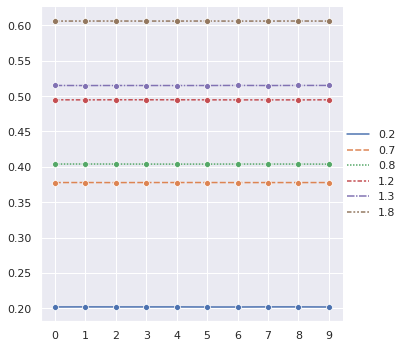

In [12]:
plt1 = sns.relplot(data=data2,kind="line",marker="o")
k =plt1.set(xticks=data2.index)


In [13]:
data2.mean()

0.2    0.201900
0.7    0.377759
0.8    0.403882
1.2    0.494707
1.3    0.514983
1.8    0.606071
dtype: float64

In [14]:
data_stats = pd.DataFrame(data2.mean())
data_stats.rename(columns={0:'dmean'}, inplace=True )
data_stats['dvar'] = data2.var()
data_stats['dstd'] = data2.std()
data_stats

,dmean,dvar,dstd
0.2,0.201900,4.155556e-09,0.000064
0.7,0.377759,1.076667e-09,0.000033
0.8,0.403882,2.595556e-09,0.000051
1.2,0.494707,4.467778e-09,0.000067
1.3,0.514983,3.778889e-09,0.000061
1.8,0.606071,1.698889e-09,0.000041


In [15]:
data_stats.dstd # Unbiased

0.2    0.000064
0.7    0.000033
0.8    0.000051
1.2    0.000067
1.3    0.000061
1.8    0.000041
Name: dstd, dtype: float64

$$\sigma = \sqrt{\frac{\sum_{i}{\left(x_i - \bar{x}\right)^2}}{N}}\;\text{(Population)}$$ or $$\sigma = \sqrt{\frac{\sum_{i}{\left(x_i - \bar{x}\right)^2}}{N-1}}\;\text{(Sample)}$$

In [16]:
import numpy as np
N = data2.shape[0]
for coll in list(data2.columns):
    s_dev = 0
    s_mean = data2.loc[:,coll].mean()
    #print(s_mean)
    for x_i in data2.loc[:,coll]:
        # print (x_i)
        s_dev += (x_i - s_mean)**2
    s_dev = np.sqrt(s_dev/(N))
    print("{:s}: {:.6f}".format(coll,s_dev))

0.2: 0.000061
0.7: 0.000031
0.8: 0.000048
1.2: 0.000063
1.3: 0.000058
1.8: 0.000039


In [17]:
data2.std(ddof=0) # Biased

0.2    0.000061
0.7    0.000031
0.8    0.000048
1.2    0.000063
1.3    0.000058
1.8    0.000039
dtype: float64

Average over all the sample deviations should be equal to the deviation of the population!

For more information on this _Bessel's Correction_, check: http://mathcenter.oxford.emory.edu/site/math117/besselCorrection/

# Types of Errors
## True error ($E_t$)
$$E_t = \text{true value} - \text{approximation}$$
## Absolute error ($\left|E_t\right|$)
$$\left|E_t\right| = \left|\text{true value} - \text{approximation}\right|$$
## True fractional relative error
$$\frac{\text{true value} - \text{approximation}}{\text{true value}}$$
## True percent relative error ($\varepsilon_t$)
$$\varepsilon_t = \frac{\text{true value} - \text{approximation}}{\text{true value}}\,100\%$$

But what if we don't know the true value?..

## Approximate percent relative error ($\varepsilon_a$)
$$\varepsilon_a = \frac{\text{present approximation} - \text{previous approximation}}{\text{present approximation}}\,100\%$$

Computations are repeated until $\left|\varepsilon_a\right| < \left|\varepsilon_s\right|$ ($\varepsilon_s$ is the satisfactory precision criterion).

The result is correct to at least $n$ significant figures given that:
$$\varepsilon_s=\left(0.5\times10^{2-n}\right)\,\%$$

### Example:
$$e^x = 1+x+\frac{x^2}{2}+\frac{x^3}{3!}+\dots+\frac{x^n}{n!}+\dots$$

To estimate $e^{0.5}$ so that the absolute value of the approximate error estimate falls below an error criterion conforming to 3 significant figures, how many terms do you need to include?

**Solution:**

$\varepsilon_s=(0.5\times 10^{2-3})\,\%$

In [18]:
eps_s = 0.5*10**(2-3)
print("{:.2f}%".format(eps_s))

0.05%


In [19]:
import numpy as np

eps_s = 0.5*10**(2-3)

x = 0.5
eps_a = 1000
e_prev = 0
no_of_terms = 0
print("{:>3} {:^10}\t{:^7}".format("#","e","E_a"))
while(eps_a > eps_s):
    e_calculated = e_prev + x**no_of_terms/np.math.factorial(no_of_terms)
    eps_a = np.abs(((e_calculated - e_prev)/e_calculated))
    print("{:3d}:{:10.6f}\t{:7.4f}".format(no_of_terms+1,e_calculated,eps_a))
    e_prev = e_calculated
    no_of_terms += 1

  #     e     	  E_a  
  1:  1.000000	 1.0000
  2:  1.500000	 0.3333
  3:  1.625000	 0.0769
  4:  1.645833	 0.0127


In [20]:
import numpy as np

eps_s = 0.5*10**(2-3)
e_sqrt_real = np.sqrt(np.e)

x = 0.5
eps_a = 1000
e_sqrt_prev = 0
no_of_terms = 0
print("{:>3} {:^13}{:^20}{:^12}".format("#","e_calc","E_a","E_t$"))
while(eps_a > eps_s):
    e_sqrt_calculated = e_sqrt_prev + x**no_of_terms/np.math.factorial(no_of_terms)
    eps_a = np.abs(((e_sqrt_calculated - e_sqrt_prev)/e_sqrt_calculated))*100
    eps_t = np.abs((e_sqrt_real - e_sqrt_calculated)/e_sqrt_real)*100
    print("{:3d}:{:10.6f}{:16.5f}{:16.5f}".format(no_of_terms+1,e_sqrt_calculated,eps_a,eps_t))
    e_sqrt_prev = e_sqrt_calculated
    no_of_terms += 1

  #    e_calc            E_a             E_t$    
  1:  1.000000       100.00000        39.34693
  2:  1.500000        33.33333         9.02040
  3:  1.625000         7.69231         1.43877
  4:  1.645833         1.26582         0.17516
  5:  1.648438         0.15798         0.01721
  6:  1.648698         0.01580         0.00142


# How good is a mean?
Once again, consider our free fall data:

In [21]:
data2

,0.2,0.7,0.8,1.2,1.3,1.8
0,0.20188,0.37775,0.40391,0.49475,0.51501,0.60603
1,0.20197,0.37779,0.40397,0.49464,0.51491,0.60610
2,0.20193,0.37770,0.40391,0.49480,0.51496,0.60610
3,0.20193,0.37779,0.40386,0.49476,0.51495,0.60608
4,0.20194,0.37779,0.40381,0.49478,0.51492,0.60605
5,0.20181,0.37780,0.40386,0.49469,0.51495,0.60612
6,0.20181,0.37773,0.40390,0.49463,0.51507,0.60601
7,0.20196,0.37774,0.40391,0.49466,0.51494,0.60606
8,0.20195,0.37774,0.40389,0.49462,0.51506,0.60613
9,0.20182,0.37776,0.40380,0.49474,0.51506,0.60603


In [22]:
data_stats

,dmean,dvar,dstd
0.2,0.201900,4.155556e-09,0.000064
0.7,0.377759,1.076667e-09,0.000033
0.8,0.403882,2.595556e-09,0.000051
1.2,0.494707,4.467778e-09,0.000067
1.3,0.514983,3.778889e-09,0.000061
1.8,0.606071,1.698889e-09,0.000041


# [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to the rescue!

In [23]:
from scipy.optimize import minimize

def fun_err(m,x):
    err = 0
    for x_i in x:
        err += (x_i - m)**2
    err = np.sqrt(err/np.prod(x.shape))
    return err

In [24]:
fun_err(data2['0.2'].mean(),data2['0.2'])

6.11555394056866e-05

In [25]:
fun_err(data2['0.2'].mean()+1,data2['0.2'])

1.00000000187

In [26]:
minimize(fun_err,data2['0.2'].mean(),args=(data2['0.2']))

      fun: 6.11555394056866e-05
 hess_inv: array([[1]])
      jac: array([0.00012183])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 70
      nit: 0
     njev: 29
   status: 2
  success: False
        x: array([0.2019])

In [27]:
data2['0.2'].mean()


0.20190000000000002

In [28]:
list(data2.columns)

['0.2', '0.7', '0.8', '1.2', '1.3', '1.8']

In [29]:
data_stats.loc['0.2','dmean']

0.20190000000000002

In [30]:
print("{:^5}: {:^8} ({:^8})".format("col","min","mean"))
for col in list(data2.columns):
    res_min = minimize(fun_err,1,args=(data2[col]))
    print("{:^5}: {:8.6f} ({:8.6f})".format(col,float(res_min.x),data_stats.loc[col,'dmean']))

 col :   min    (  mean  )
 0.2 : 0.201900 (0.201900)
 0.7 : 0.377759 (0.377759)
 0.8 : 0.403882 (0.403882)
 1.2 : 0.494707 (0.494707)
 1.3 : 0.514983 (0.514983)
 1.8 : 0.606071 (0.606071)


In [31]:
print("{:.6f}".format(data_stats.loc[col,'dmean']))

0.606071


## Couldn't the cost function be better?

In [32]:
def fun_err2(m,x):
    err = 0
    for x_i in x:
        err += (x_i - m)**2
    #err = np.sqrt(err/np.prod(x.shape))
    return err

In [33]:
fun_err2(data2['0.2'].mean(),data2['0.2'])

3.740000000000487e-08

In [34]:
minimize(fun_err2,data2['0.2'].mean(),args=(data2['0.2']))

      fun: 3.740000000000487e-08
 hess_inv: array([[1]])
      jac: array([1.49011612e-07])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.2019])

In [35]:
print("{:^5}: {:^8} ({:^8})".format("col","min","mean"))
for col in list(data2.columns):
    res_min = minimize(fun_err2,1,args=(data2[col]))
    print("{:^5}: {:8.6f} ({:8.6f})".format(col,float(res_min.x),data_stats.loc[col,'dmean']))

 col :   min    (  mean  )
 0.2 : 0.201900 (0.201900)
 0.7 : 0.377759 (0.377759)
 0.8 : 0.403882 (0.403882)
 1.2 : 0.494707 (0.494707)
 1.3 : 0.514983 (0.514983)
 1.8 : 0.606071 (0.606071)


In [36]:
def fun_err3(m,x):
    err = 0
    for x_i in x:
        err += np.abs(x_i - m)
    #err = np.sqrt(err/np.prod(x.shape))
    return err

In [37]:
fun_err3(data2['0.2'].mean(),data2['0.2'])

0.0005599999999999772

In [38]:
minimize(fun_err3,data2['0.2'].mean(),args=(data2['0.2']))

      fun: 0.0005000017699288428
 hess_inv: array([[7.97330502e-06]])
      jac: array([1.76244418])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 120
      nit: 1
     njev: 54
   status: 2
  success: False
        x: array([0.20193])

In [39]:
data_exp = pd.DataFrame(data_stats.dmean)

In [40]:
data_exp

,dmean
0.2,0.201900
0.7,0.377759
0.8,0.403882
1.2,0.494707
1.3,0.514983
1.8,0.606071


In [41]:
def freefall_err(g,y_exp,t):
    err = 0
    y_theo = 0.5*g*t**2
    err = (y_theo - y_exp)**2
    return np.sum(err)

In [42]:
y_exp = np.array(list(data_exp.index))
print(y_exp)

['0.2' '0.7' '0.8' '1.2' '1.3' '1.8']


In [43]:
y_exp.dtype

dtype('<U3')

In [44]:
y_exp = np.array(list(data_exp.index),dtype=float)
y_exp.dtype

dtype('float64')

In [45]:
print(y_exp)

[0.2 0.7 0.8 1.2 1.3 1.8]


In [46]:
t = np.array(list(data_exp.dmean[:]))
print(t)

[0.2019   0.377759 0.403882 0.494707 0.514983 0.606071]


## We can do that manually!... (???)

In [47]:
freefall_err(9,y_exp,t)

0.05069082651399326

In [48]:
freefall_err(9.1,y_exp,t)

0.0388634097682171

In [49]:
for g in np.arange(9,10,0.1):
    print("{:5.3f}:{:10.6f}".format(g,freefall_err(g,y_exp,t)))

9.000:  0.050691
9.100:  0.038863
9.200:  0.028605
9.300:  0.019915
9.400:  0.012795
9.500:  0.007243
9.600:  0.003261
9.700:  0.000847
9.800:  0.000002
9.900:  0.000726


In [50]:
for g in np.arange(9.7,9.9,0.01):
    print("{:5.3f}:{:10.6f}".format(g,freefall_err(g,y_exp,t)))

9.700:  0.000847
9.710:  0.000692
9.720:  0.000552
9.730:  0.000429
9.740:  0.000321
9.750:  0.000228
9.760:  0.000152
9.770:  0.000091
9.780:  0.000045
9.790:  0.000016
9.800:  0.000002
9.810:  0.000004
9.820:  0.000021
9.830:  0.000055
9.840:  0.000103
9.850:  0.000168
9.860:  0.000248
9.870:  0.000344
9.880:  0.000456
9.890:  0.000583
9.900:  0.000726


In [51]:
for g in np.arange(9.79,9.81,0.001):
    print("{:5.3f}:{:10.8f}".format(g,freefall_err(g,y_exp,t)))

9.790:0.00001591
9.791:0.00001382
9.792:0.00001188
9.793:0.00001010
9.794:0.00000848
9.795:0.00000701
9.796:0.00000570
9.797:0.00000455
9.798:0.00000355
9.799:0.00000272
9.800:0.00000203
9.801:0.00000151
9.802:0.00000114
9.803:0.00000093
9.804:0.00000088
9.805:0.00000098
9.806:0.00000124
9.807:0.00000166
9.808:0.00000223
9.809:0.00000296
9.810:0.00000385


In [52]:
res_min = minimize(freefall_err,x0=1,args=(y_exp,t))
print(res_min)

      fun: 8.748023164225757e-07
 hess_inv: array([[6.3736979]])
      jac: array([-2.0061961e-09])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([9.8038438])


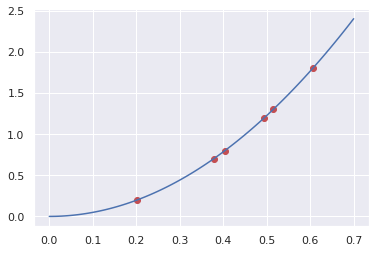

In [53]:
import matplotlib.pyplot as plt
plt.plot(t,y_exp,"or")
tt = np.linspace(0,0.7,100)
plt.plot(tt,0.5*res_min.x*tt**2,"-b")
plt.show()

## Least Squares ([scipy.optimize.least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html)) but not least! 8)

In [54]:
from scipy.optimize import least_squares
g0 = 1
def fun_yt(g,t):
    return 0.5*g*t**2
t = np.array(list(data_exp.dmean[:]))
y_exp = np.array(list(data_exp.index),dtype=float)

def fun(g):
    return fun_yt(g,t) - y_exp

res_ls = least_squares(fun,g0)
print(res_ls)

 active_mask: array([0.])
        cost: 4.37401158195697e-07
         fun: array([-1.79967166e-04, -4.86616214e-04, -3.95214750e-04, -3.28064602e-04,
        2.64063287e-05,  5.84038030e-04])
        grad: array([-2.67962338e-10])
         jac: array([[0.02038181],
       [0.07135093],
       [0.08156033],
       [0.12236751],
       [0.13260375],
       [0.18366103]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 5
        njev: 5
  optimality: 2.679623382315392e-10
      status: 1
     success: True
           x: array([9.80384381])


# Various Definitions
## Sum of the squares of the data residuals ($S_t$)
$$S_t = \sum_{i}{\left(y_i - \bar{y}\right)^2}$$
($\leftrightarrow$ Standard deviation $\sigma=\sqrt{\frac{S_t}{n-1}}$, variance $sigma^2=\frac{\sum_{i}{\left(y_i-\bar{y}\right)^2}}{n-1}=\frac{\sum_{i}{y_i^2}-\left(\sum_{i}{y_i}\right)^2/n}{n-1}$)
## Coefficient of variation
$$\text{c.v.} = \frac{s_y}{\bar{y}}\times\,100\%$$
## Sum of the squares of the estimate residuals ($S_r$)
$$S_r = \sum_{i}{e_i^2}=\sum_{i}\left(y_i-a_0-a_1 x_i\right)^2$$
## Standard error of the estimate: ($s_{y/x}$)
$$s_{y/x}= \sqrt{\frac{S_r}{n-2}}$$

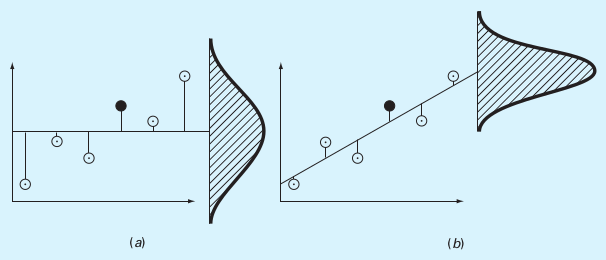
(a) $S_t$, (b) $S_r$

(Source: Chapra)

## Coefficient of Determination ($r^2$)
$$r^2 = \frac{S_t-S_r}{S_t}$$

# Linearization of Non-linear Relationships


It doesn't much matter even if the model we're trying to fit is non-linear. We can simply apply a transformation to form it into a linear one. Here are a couple example for handling non-linear functions:

|Model|Nonlinear|Linearized|
|---|---|---|
|exponential|$y=\alpha_1 e^{\beta_1 x}$|$\ln{y}=\ln{\alpha_1}+\beta_1 x$|
|power|$y = \alpha_2 x^{\beta_2}$|$\log{y}=\log{\alpha_2}+\beta_2\log{x}$|
|saturation-growth-rate|$y=\alpha_3\frac{x}{\beta_3+x}$|$\frac{1}{y}=\frac{1}{\alpha_3}+\frac{\beta_3}{\alpha_3}\frac{1}{x}$

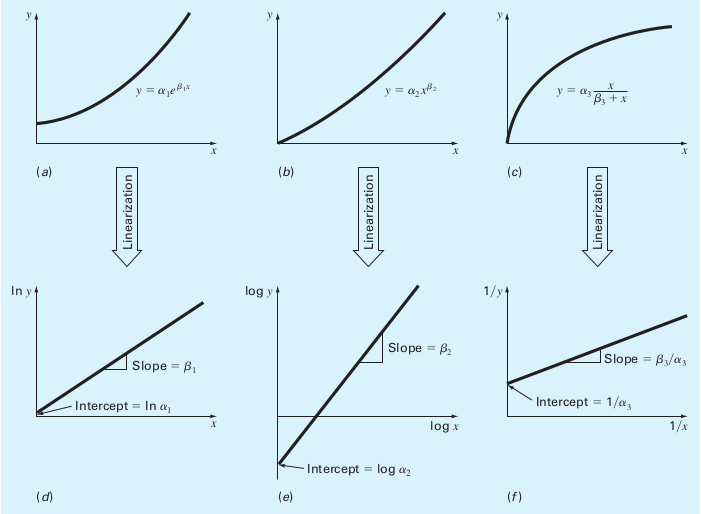
Source: Chapra

**Example: Fit the data to the power model (Chapra, 14.6)**  
Data:  

|$i$|$x_i$|$y_i$|
|---|---|---|
|1|10|25|
|2|20|70|
|3|30|380|
|4|40|550|
|5|50|610|
|6|60|1220|
|7|70|830|
|8|80|1450|

Find the optimum $\alpha$ and $\beta$ for the best fit of $y=\alpha x^\beta$ for the given data.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data1 = pd.DataFrame({'i':np.arange(1,9),'x':np.arange(10,90,10),
                      'y':[25,70,380,550,610,1220,830,1450]})
data1.set_index('i', inplace=True)

In [56]:
data1

,x,y
i,,
1,10,25
2,20,70
3,30,380
4,40,550
5,50,610
6,60,1220
7,70,830
8,80,1450


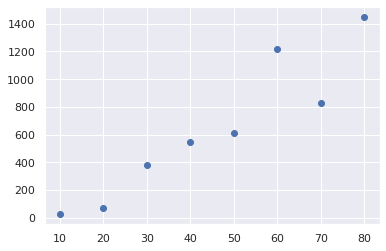

In [57]:
plt.plot(data1.x,data1.y,"o")
plt.show()

## Least-squares proper way:
We can convert it such that $$\log{y}=\log{\alpha} + \beta\log{x}$$ 

and as the least square fit for a linear model given as $y' = a_0 + a_1 x'$ is:

$$a_1 = \frac{n\sum{x_i' y_i'} - \sum{x_i'}\sum{y_i'}}{n\sum{x_i'^2}-\left(\sum{x_i'}\right)^2}$$

$$a_0 = \bar{y}' - a_1\bar{x}'$$


(For derivations, refer to [FIZ219 Lecture Notes #5](https://emresururi.github.io/FIZ219/FIZ219_EST_UygulamaNotlari_05_En_kucuk_kareler.html))

and since $x_i' = \log{x_i},\;y_i' = \log{y_i}$:


In [58]:
n = data1.shape[0]
xp = np.log(data1.x)
yp = np.log(data1.y)

a1 = (n*np.sum(xp*yp)-np.sum(xp)*np.sum(yp)) / (n*np.sum(xp**2) - np.sum(xp)**2)
a0 = np.mean(yp) - a1*np.mean(xp)

print("a0: {:7.4f}\na1: {:7.4f}".format(a0,a1))

a0: -1.2941
a1:  1.9842


as $a_0 = \log{\alpha}\rightarrow \alpha = e^{a_0}$ and $a_1 x' = \beta\log{x}\rightarrow  \beta = a_1$

In [59]:
alpha = np.exp(a0)
beta = a1
print("alpha: {:7.4f}\nbeta:  {:7.4f}".format(alpha,beta))

alpha:  0.2741
beta:   1.9842


In [60]:
def fun(alpha, beta, x):
    return alpha*x**beta

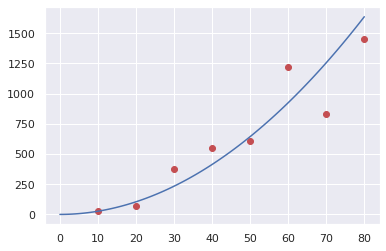

In [61]:
xx = np.linspace(0,80,100);
yy = fun(alpha,beta,xx)
plt.plot(data1.x,data1.y,"or",xx,yy,"-b")
plt.show()

## Minimizing the error function:


In [62]:
def fun(alpha, beta, x):
    return alpha*x**beta

x = data1.x
y = data1.y
def err(params):
    e = y - fun(params[0],params[1],x)
    return np.sum(e**2)

from scipy.optimize import minimize

res = minimize(err,[0.274,1.98])
print(res)
alpha2,beta2 = res.x

      fun: 222604.8484396939
 hess_inv: array([[ 8.34770117e-09, -4.45042043e-09],
       [-4.45042043e-09,  7.67927578e-09]])
      jac: array([-0.00390625,  0.05664062])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 214
      nit: 33
     njev: 68
   status: 2
  success: False
        x: array([2.53844123, 1.4358492 ])


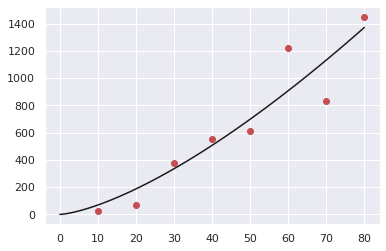

In [63]:
xx = np.linspace(0,80,100);
yy2 = fun(alpha2,beta2,xx)
plt.plot(data1.x,data1.y,"or",xx,yy2,"-k")
plt.show()

### Which one is better?

In [64]:
err_ls = err([alpha,beta])
err_min = err([alpha2,beta2])
print("Least-square sum of squares error: {:10.2f}".format(err_ls))
print("   Minimizer sum of squares error: {:10.2f}".format(err_min))

Least-square sum of squares error:  345713.59
   Minimizer sum of squares error:  222604.85


Let's plot the two side by side:

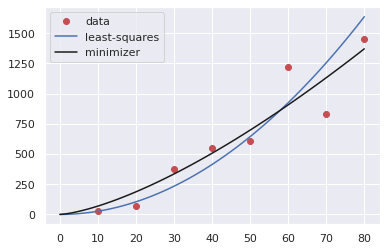

In [65]:
xx = np.linspace(0,80,100);
yy_ls = fun(alpha,beta,xx)
yy_min = fun(alpha2,beta2,xx)
# Blue for least-squares, Black for minimizer
plt.plot(data1.x,data1.y,"or",xx,yy_ls,"-b",xx,yy_min,"-k")
plt.legend(["data","least-squares","minimizer"])
plt.show()

## Linear side of things
It is always safe to stay on the linear side of the things, whever possible. So, consider the following data:

In [66]:
data_l = np.array(([[ 1.    ,  4.9142],
       [ 2.    ,  7.1201],
       [ 3.    ,  8.8456],
       [ 4.    , 10.8113],
       [ 5.    , 13.2231]]))
data_l

array([[ 1.    ,  4.9142],
       [ 2.    ,  7.1201],
       [ 3.    ,  8.8456],
       [ 4.    , 10.8113],
       [ 5.    , 13.2231]])

Let's fit it to a $f(x) = a + bx$ model:

In [67]:
x = data_l[:,0]
y = data_l[:,1]

def fun(x,a,b):
    return a+b*x

In [68]:
import scipy.optimize as opt

In [69]:
# Curve fitting
res_cf = opt.curve_fit(fun,x,y)
print(res_cf)

(array([2.89016, 2.0309 ]), array([[ 0.04399608, -0.01199893],
       [-0.01199893,  0.00399964]]))


In [70]:
def err(ab):
    return np.sum((y - (ab[0]+ab[1]*x))**2)

In [71]:
# Minimizer
res_min = opt.minimize(err,[0.1,0.1])
print(res_min)

      fun: 0.1199893120000094
 hess_inv: array([[ 0.55023779, -0.15006911],
       [-0.15006911,  0.05002009]])
      jac: array([-3.7252903e-09,  3.7252903e-09])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([2.89016008, 2.03089997])


In [72]:
# Least-squares
res_ls = opt.least_squares(err,[0.1,0.1],max_nfev=500)
print(res_ls)

 active_mask: array([0., 0.])
        cost: 0.007198718649123573
         fun: array([0.11998932])
        grad: array([-1.50940918e-05,  2.60642795e-05])
         jac: array([[-0.0001258 ,  0.00021722]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 357
        njev: 354
  optimality: 2.6064279515221427e-05
      status: 2
     success: True
           x: array([2.89005837, 2.03092968])


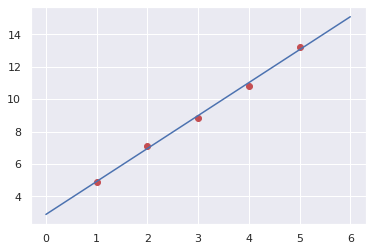

In [73]:
xx = np.linspace(0,6,100)
plt.plot(x,y,"or",xx,res_ls.x[0]+res_ls.x[1] * xx,"-b")
plt.show()

# Homework
1. Come up with a (linear) data-set (of 5 to 10 elements) where its mean isn't it's best fit. Why is the one you have found, behaving differently than the g fits we had for each height?
1. Understand the derivation of the coefficients $a_0$ and $a_1$ for the linear least-squares fit.
2. Calculate the coefficients for the following data for the model $y = a_0 + a_1 x$:  
`    x         y 
    1.0000    4.9142
    2.0000    7.1201
    3.0000    8.8456
    4.0000   10.8113
    5.0000   13.2231`  
    using both the least-squares fit and the minimizer methods. Are they different?
3. Discuss the reason for the difference of the two methods' assignment of the coefficients (in Chapra's 14.6). Do you really think that the minimizer approach is better? Why?

# References
* D. Horvat & R. Jecmenica, "The Free Fall Experiment" Resonance 21 259-275 (2016) [https://doi.org/10.1007/s12045-016-0321-9]
* This lecture is heavily benefited from Steven Chapra's [Applied Numerical Methods with MATLAB: for Engineers & Scientists](https://www.mheducation.com/highered/product/applied-numerical-methods-matlab-engineers-scientists-chapra/M9780073397962.html).